패키지 불러오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Merge, LSTM, Flatten, GRU, BatchNormalization, Dense, Dropout,Reshape, Activation, advanced_activations, Conv2D, TimeDistributed, pooling, AveragePooling2D, MaxPooling2D, Flatten
from keras.layers.convolutional import Deconvolution2D
from keras import losses

Using TensorFlow backend.


데이터 준비

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train/255
X_test = X_test/255

trainbatch_noisy = X_train + 0.3*np.random.randn(X_train.shape[0], 784)

mean_img = np.mean(X_train, axis=0)
centralized_trainbatch = np.array([img - mean_img for img in X_train])
centralized_trainbatch_noisy = centralized_trainbatch + 0.3*np.random.randn(centralized_trainbatch.shape[0], 784)

실험 1

MaxPooling + MSE
MaxPooling + MAE
AveragePooling + MSE
AveragePooling + MAE

결과 

- MaxPooling이 전반적으로 잘나옴(AveragePooling도 잘 될때는 잘 되지만 복원이미지에 점이 찍혀나오는 경우가 생김)
- MAE는 학습이 안됨(why?)
- 한 epoch(60,000개 데이터) 다 돌지 않고, iteration를 기준으로(batch, 128개 데이터) loss를 출력해 보거나 prediction 하는 방법은 없을까?
  ex) 100 iteration 마다 출력 => 12,800개 학습 후 출력

MaxPooling with MSE

In [4]:
model1 = Sequential()
model1.add(Conv2D(16, kernel_size=(5,5), strides=(2,2), padding = 'same', activation='relu',input_shape=(28,28,1)))
model1.add(Conv2D(32, kernel_size=(5,5), strides=(2,2),padding = 'same', activation='relu'))
model1.add(Conv2D(64, kernel_size=(5,5), strides=(2,2), padding = 'same', activation='relu'))
model1.add(Deconvolution2D(32,kernel_size=(5,5), strides=(2,2), padding = 'same', activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding = 'valid'))
model1.add(Deconvolution2D(16,kernel_size=(5,5), strides=(2,2), padding = 'same', activation = 'relu'))
model1.add(Deconvolution2D(1,kernel_size=(5,5), strides=(2,2), padding = 'same', activation = 'relu'))
model1.compile(loss='mse', optimizer='adam', metrics=['mse'])  

MaxPooling with MAE

In [5]:
model2 = Sequential()
model2.add(Conv2D(16, kernel_size=(5,5), strides=(2,2), padding = 'same', activation='relu',input_shape=(28,28,1)))
model2.add(Conv2D(32, kernel_size=(5,5), strides=(2,2),padding = 'same', activation='relu'))
model2.add(Conv2D(64, kernel_size=(5,5), strides=(2,2), padding = 'same', activation='relu'))
model2.add(Deconvolution2D(32,kernel_size=(5,5), strides=(2,2), padding = 'same', activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding = 'valid'))
model2.add(Deconvolution2D(16,kernel_size=(5,5), strides=(2,2), padding = 'same', activation = 'relu'))
model2.add(Deconvolution2D(1,kernel_size=(5,5), strides=(2,2), padding = 'same', activation = 'relu'))
model2.compile(loss='mae', optimizer='adam', metrics=['mae']) 

AveragePooling with MSE

In [6]:
model3 = Sequential()
model3.add(Conv2D(16, kernel_size=(5,5), strides=(2,2), padding = 'same', activation='relu',input_shape=(28,28,1)))
model3.add(Conv2D(32, kernel_size=(5,5), strides=(2,2),padding = 'same', activation='relu'))
model3.add(Conv2D(64, kernel_size=(5,5), strides=(2,2), padding = 'same', activation='relu'))
model3.add(Deconvolution2D(32,kernel_size=(5,5), strides=(2,2), padding = 'same', activation = 'relu'))
model3.add(AveragePooling2D(pool_size=(2,2), strides=(1,1), padding = 'valid'))
model3.add(Deconvolution2D(16,kernel_size=(5,5), strides=(2,2), padding = 'same', activation = 'relu'))
model3.add(Deconvolution2D(1,kernel_size=(5,5), strides=(2,2), padding = 'same', activation = 'relu'))
model3.compile(loss='mse', optimizer='adam', metrics=['mse'])  

AveragePooling with MAE

In [7]:
model4 = Sequential()
model4.add(Conv2D(16, kernel_size=(5,5), strides=(2,2), padding = 'same', activation='relu',input_shape=(28,28,1)))
model4.add(Conv2D(32, kernel_size=(5,5), strides=(2,2),padding = 'same', activation='relu'))
model4.add(Conv2D(64, kernel_size=(5,5), strides=(2,2), padding = 'same', activation='relu'))
model4.add(Deconvolution2D(32,kernel_size=(5,5), strides=(2,2), padding = 'same', activation = 'relu'))
model4.add(AveragePooling2D(pool_size=(2,2), strides=(1,1), padding = 'valid'))
model4.add(Deconvolution2D(16,kernel_size=(5,5), strides=(2,2), padding = 'same', activation = 'relu'))
model4.add(Deconvolution2D(1,kernel_size=(5,5), strides=(2,2), padding = 'same', activation = 'relu'))
model4.compile(loss='mae', optimizer='adam', metrics=['mae'])  

Training
그림 순서 : 노이즈 데이터, MaxPooling & MSE, MaxPooling & MAE, AveragePooling & MSE, AveragePooling & MAE, 원본(타겟)

Epoch 1/1
60000/60000 [==============================] - 33s - loss: 0.0271 - mean_squared_error: 0.0271    
Epoch 1/1
60000/60000 [==============================] - 32s - loss: 0.1307 - mean_absolute_error: 0.1307    
Epoch 1/1
60000/60000 [==============================] - 32s - loss: 0.0289 - mean_squared_error: 0.0289    
Epoch 1/1
60000/60000 [==============================] - 32s - loss: 0.1307 - mean_absolute_error: 0.1307    


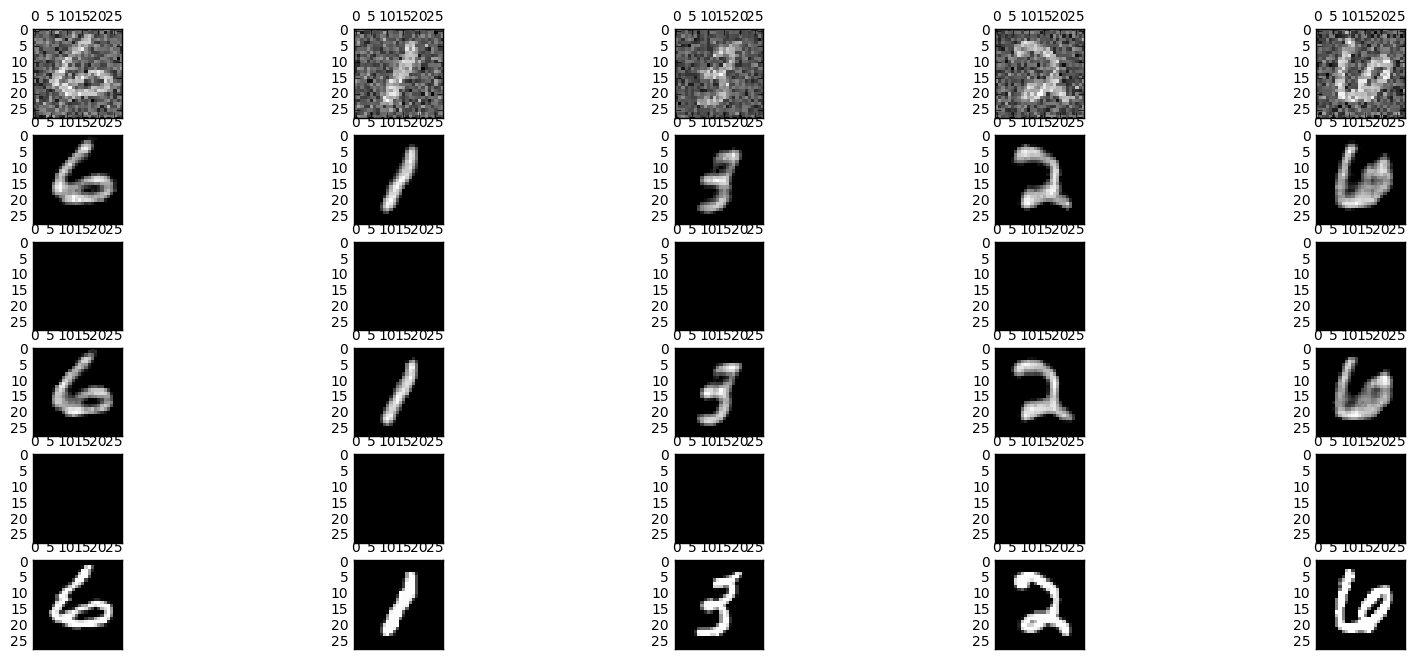

Epoch 1/1
60000/60000 [==============================] - 32s - loss: 0.0117 - mean_squared_error: 0.0117    
Epoch 1/1
60000/60000 [==============================] - 32s - loss: 0.1307 - mean_absolute_error: 0.1307    
Epoch 1/1
60000/60000 [==============================] - 31s - loss: 0.0117 - mean_squared_error: 0.0117    
Epoch 1/1
60000/60000 [==============================] - 31s - loss: 0.1307 - mean_absolute_error: 0.1307    


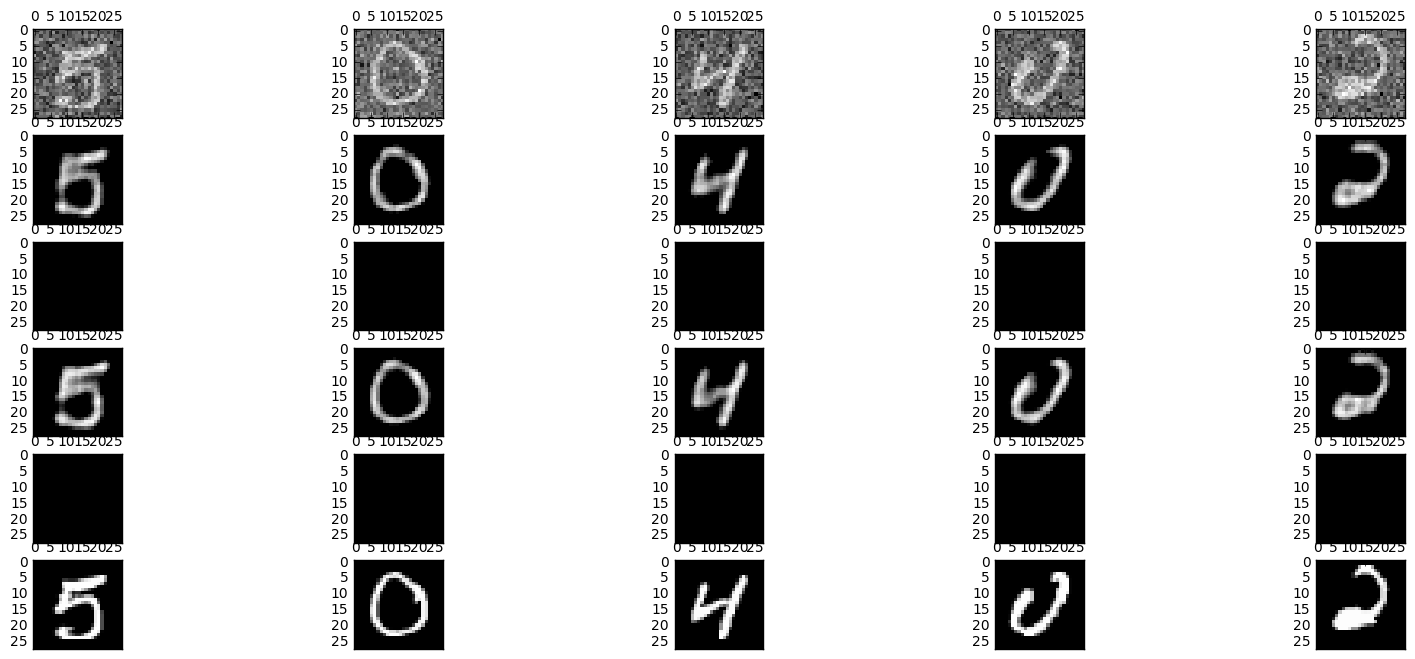

Epoch 1/1
60000/60000 [==============================] - 31s - loss: 0.0096 - mean_squared_error: 0.0096    
Epoch 1/1
60000/60000 [==============================] - 32s - loss: 0.1307 - mean_absolute_error: 0.1307    
Epoch 1/1
60000/60000 [==============================] - 31s - loss: 0.0095 - mean_squared_error: 0.0095    
Epoch 1/1
60000/60000 [==============================] - 31s - loss: 0.1307 - mean_absolute_error: 0.1307    


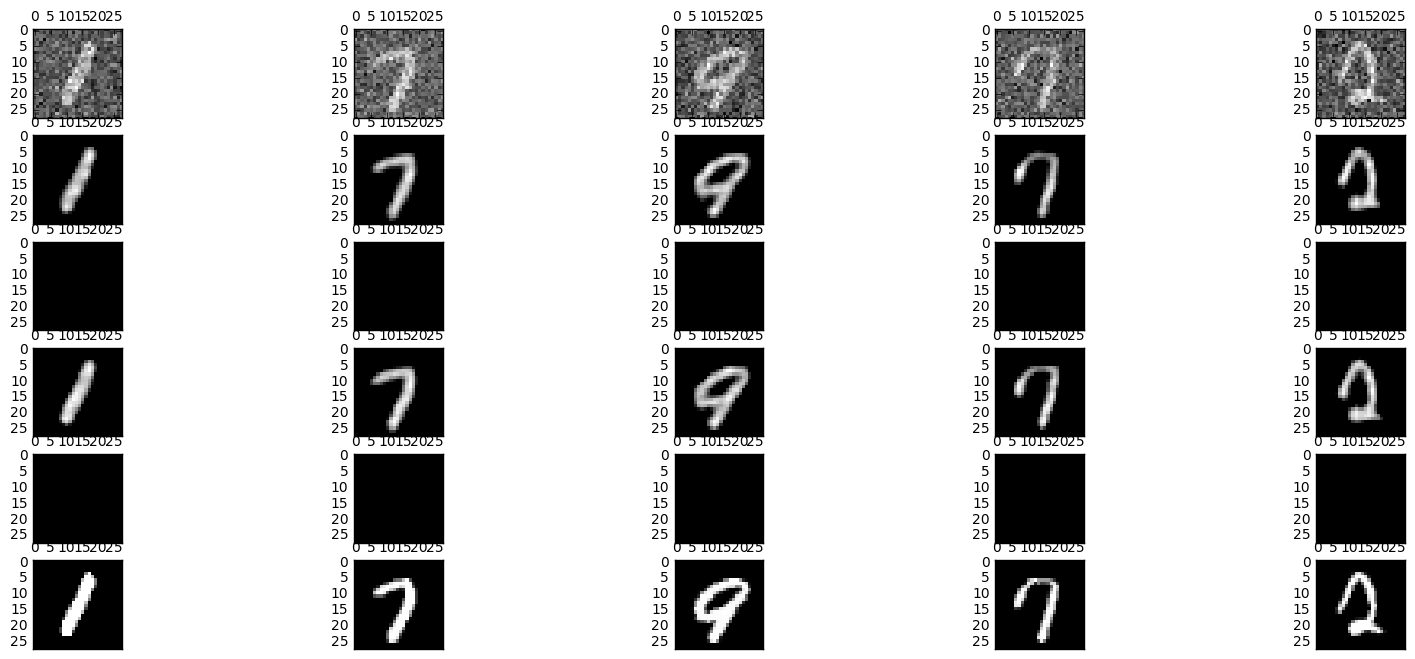

Epoch 1/1
60000/60000 [==============================] - 31s - loss: 0.0086 - mean_squared_error: 0.0086    
Epoch 1/1
60000/60000 [==============================] - 31s - loss: 0.1307 - mean_absolute_error: 0.1307    
Epoch 1/1
60000/60000 [==============================] - 31s - loss: 0.0085 - mean_squared_error: 0.0085    
Epoch 1/1
60000/60000 [==============================] - 31s - loss: 0.1307 - mean_absolute_error: 0.1307    


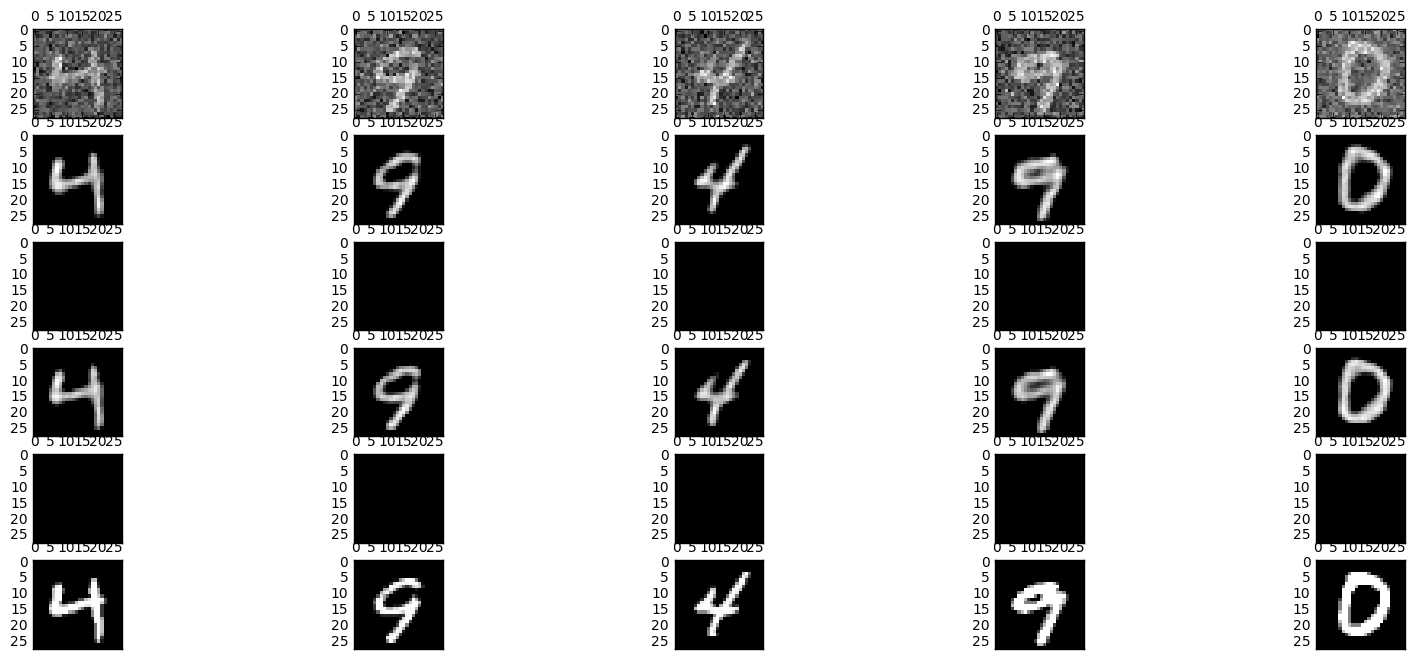

Epoch 1/1
60000/60000 [==============================] - 32s - loss: 0.0080 - mean_squared_error: 0.0080    
Epoch 1/1
60000/60000 [==============================] - 31s - loss: 0.1307 - mean_absolute_error: 0.1307    
Epoch 1/1
60000/60000 [==============================] - 31s - loss: 0.0079 - mean_squared_error: 0.0079    
Epoch 1/1
60000/60000 [==============================] - 31s - loss: 0.1307 - mean_absolute_error: 0.1307    


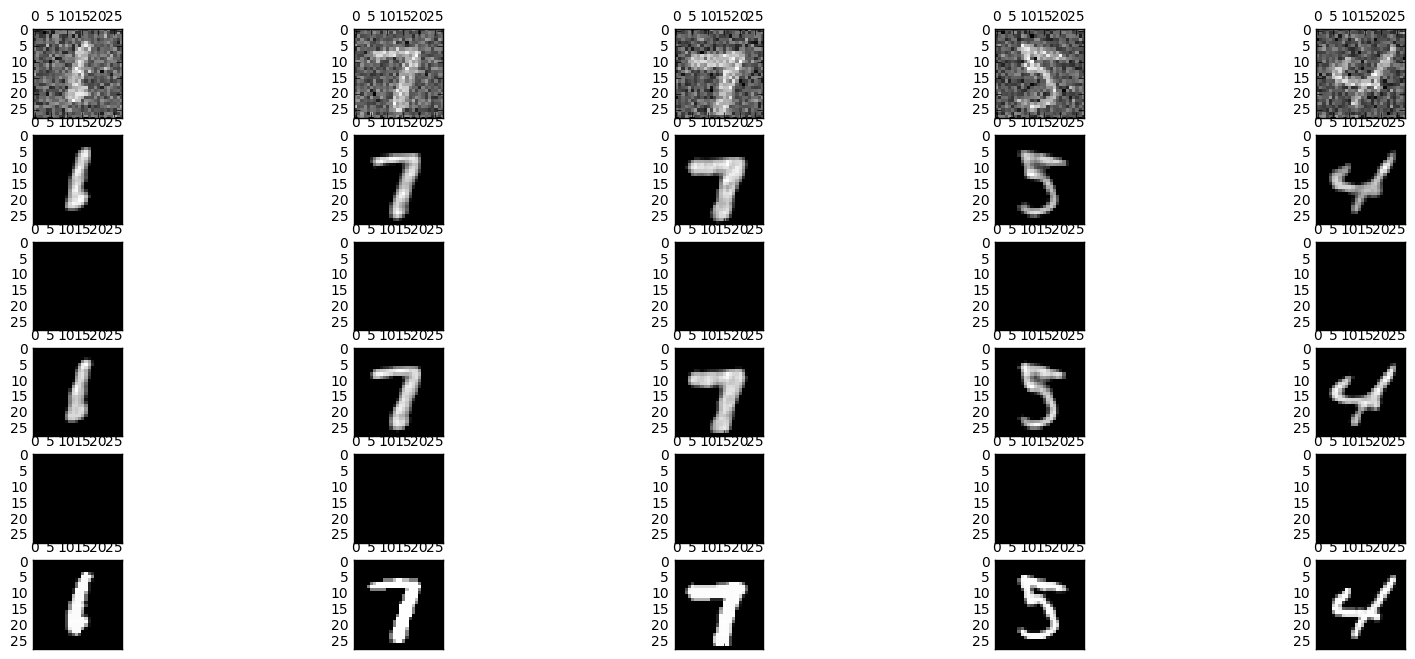

In [8]:
for i in range(5): 
    model1.fit(np.reshape(trainbatch_noisy,(-1,28,28,1)), np.reshape(X_train,(-1,28,28,1)), batch_size=128, epochs=1) 
    model2.fit(np.reshape(trainbatch_noisy,(-1,28,28,1)), np.reshape(X_train,(-1,28,28,1)), batch_size=128, epochs=1) 
    model3.fit(np.reshape(trainbatch_noisy,(-1,28,28,1)), np.reshape(X_train,(-1,28,28,1)), batch_size=128, epochs=1) 
    model4.fit(np.reshape(trainbatch_noisy,(-1,28,28,1)), np.reshape(X_train,(-1,28,28,1)), batch_size=128, epochs=1) 
    test_list = list(range(len(X_test)))           
    np.random.shuffle(test_list)     
    test_batch = test_list[0:5]
    testbatch = X_test[test_batch]
    testbatch_noisy = testbatch + 0.3*np.random.randn(testbatch.shape[0], 784)
    prediction1 = model1.predict(np.reshape(testbatch_noisy,(-1,28,28,1)))
    prediction2 = model2.predict(np.reshape(testbatch_noisy,(-1,28,28,1)))
    prediction3 = model3.predict(np.reshape(testbatch_noisy,(-1,28,28,1)))
    prediction4 = model4.predict(np.reshape(testbatch_noisy,(-1,28,28,1)))
    fig, axs = plt.subplots(6, 5, figsize=(20,8))
    for example_i in range(5):
        axs[0][example_i].matshow(np.reshape(
            testbatch_noisy[example_i, :], (28, 28))
            , cmap=plt.get_cmap('gray'))
        axs[1][example_i].matshow(np.reshape(
            prediction1[example_i, ...], (28, 28))
            , cmap=plt.get_cmap('gray'))
        axs[2][example_i].matshow(np.reshape(
            prediction2[example_i, ...], (28, 28))
            , cmap=plt.get_cmap('gray'))
        axs[3][example_i].matshow(np.reshape(
            prediction3[example_i, ...], (28, 28))
            , cmap=plt.get_cmap('gray'))
        axs[4][example_i].matshow(np.reshape(
            prediction4[example_i, ...], (28, 28))
            , cmap=plt.get_cmap('gray'))
        axs[5][example_i].matshow(np.reshape(
            testbatch[example_i, :], (28, 28))
            , cmap=plt.get_cmap('gray'))
    plt.show()            

In [15]:
model1.count_params()   #모델 parameter 개수

128961

In [ ]:
실험 2

CAE에서 Batchnormalization이 미치는 영향

결과 

- encoding-decoding 모든 레이어에 배치놈을 추가 했더니, 속도와 성능이 모두 저하됨.
- encoding에만 배치놈을 추가했더니, 속도는 느려졌지만 error가 줄어듦.

Epoch 1/1
60000/60000 [==============================] - 49s - loss: 0.0441 - mean_squared_error: 0.0441    
Epoch 1/1
60000/60000 [==============================] - 32s - loss: 0.0280 - mean_squared_error: 0.0280    
Epoch 1/1
60000/60000 [==============================] - 39s - loss: 0.0315 - mean_squared_error: 0.0315    


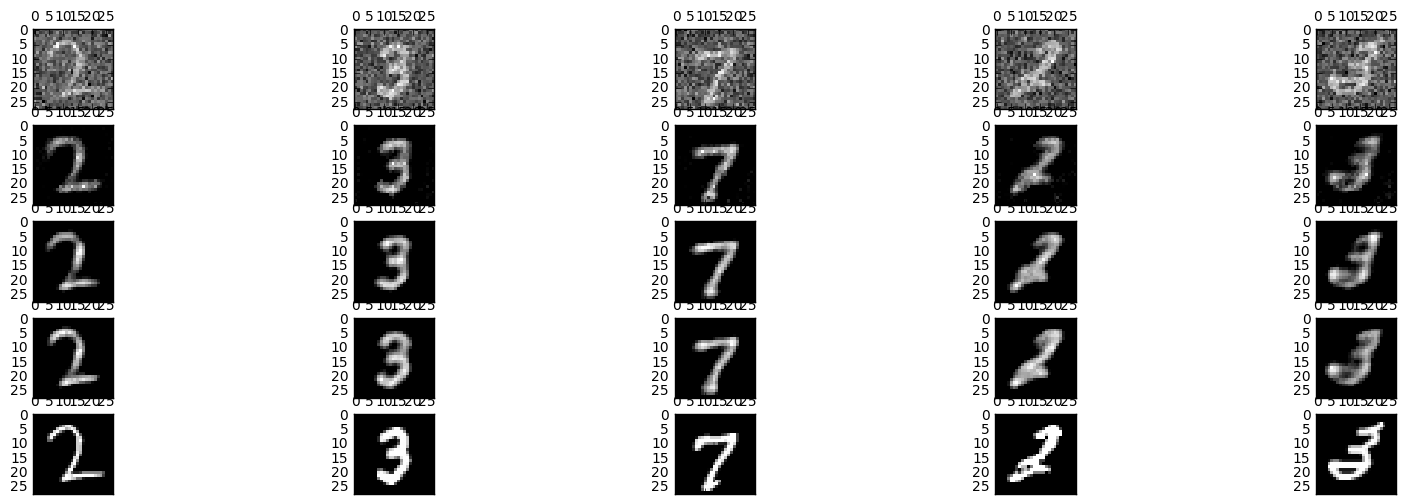

Epoch 1/1
60000/60000 [==============================] - 46s - loss: 0.0117 - mean_squared_error: 0.0117    
Epoch 1/1
60000/60000 [==============================] - 31s - loss: 0.0110 - mean_squared_error: 0.0110    
Epoch 1/1
60000/60000 [==============================] - 39s - loss: 0.0095 - mean_squared_error: 0.0095    


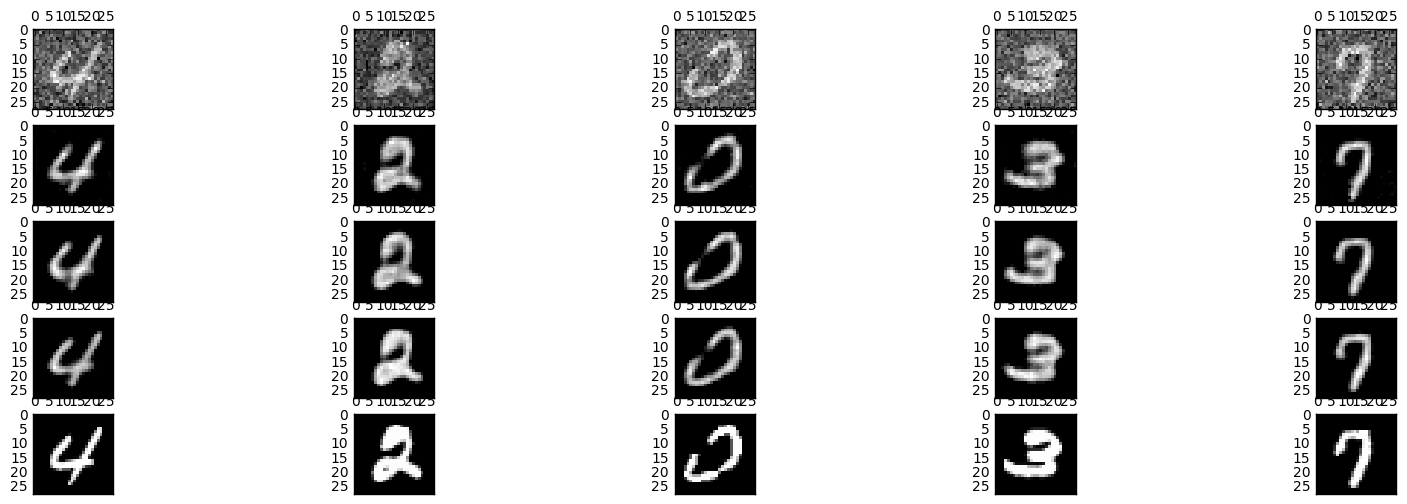

Epoch 1/1
60000/60000 [==============================] - 46s - loss: 0.0094 - mean_squared_error: 0.0094    
Epoch 1/1
60000/60000 [==============================] - 31s - loss: 0.0091 - mean_squared_error: 0.0091    
Epoch 1/1
60000/60000 [==============================] - 38s - loss: 0.0080 - mean_squared_error: 0.0080    


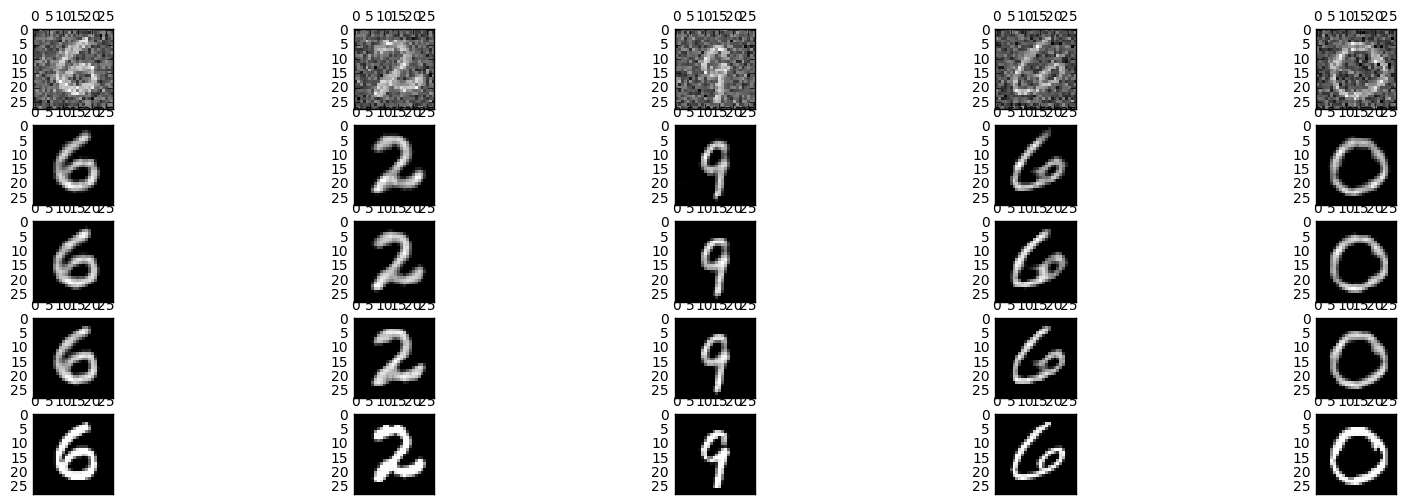

Epoch 1/1
60000/60000 [==============================] - 47s - loss: 0.0084 - mean_squared_error: 0.0084    
Epoch 1/1
60000/60000 [==============================] - 31s - loss: 0.0082 - mean_squared_error: 0.0082    
Epoch 1/1
60000/60000 [==============================] - 38s - loss: 0.0073 - mean_squared_error: 0.0073    


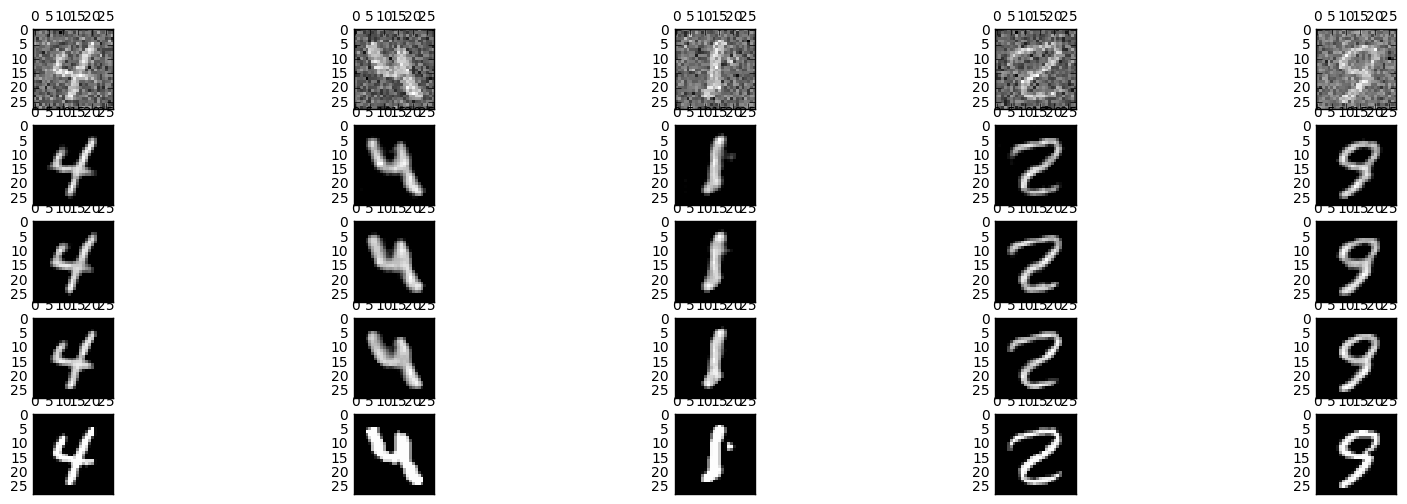

Epoch 1/1
60000/60000 [==============================] - 46s - loss: 0.0078 - mean_squared_error: 0.0078    
Epoch 1/1
60000/60000 [==============================] - 31s - loss: 0.0076 - mean_squared_error: 0.0076    
Epoch 1/1
60000/60000 [==============================] - 38s - loss: 0.0069 - mean_squared_error: 0.0069    


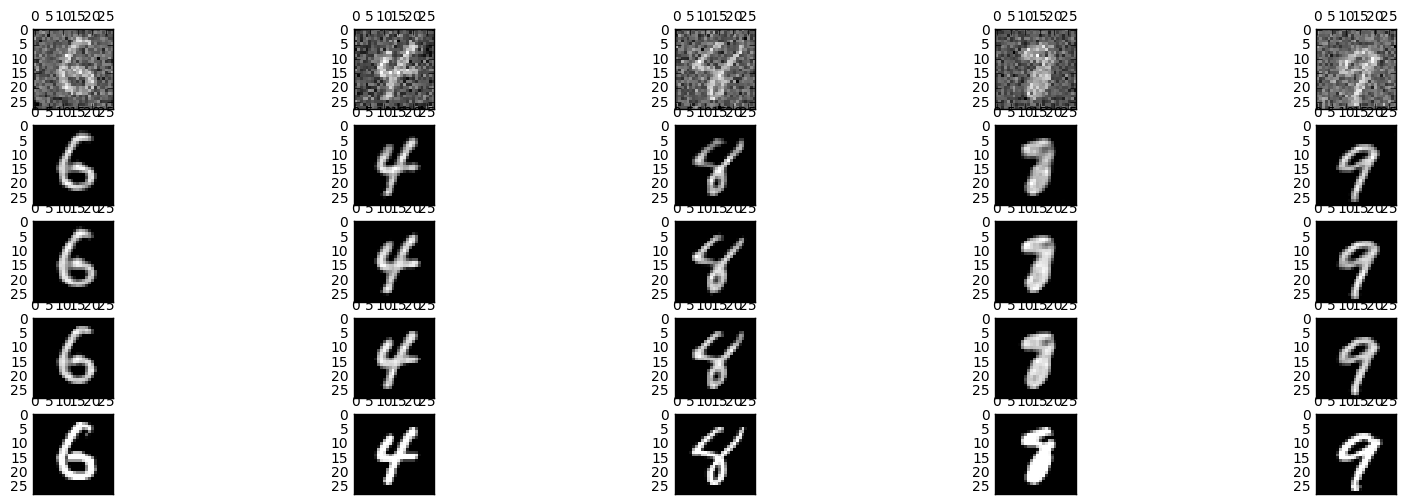

In [3]:
model_a = Sequential()
model_a.add(Conv2D(16, kernel_size=(5,5), strides=(2,2), padding = 'same', input_shape=(28,28,1)))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(Conv2D(32, kernel_size=(5,5), strides=(2,2),padding = 'same'))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(Conv2D(64, kernel_size=(5,5), strides=(2,2), padding = 'same'))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(Deconvolution2D(32,kernel_size=(5,5), strides=(2,2), padding = 'same'))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding = 'valid'))
model_a.add(Deconvolution2D(16,kernel_size=(5,5), strides=(2,2), padding = 'same'))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(Deconvolution2D(1,kernel_size=(5,5), strides=(2,2), padding = 'same'))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.compile(loss='mse', optimizer='adam', metrics=['mse'])  

model_b = Sequential()
model_b.add(Conv2D(16, kernel_size=(5,5), strides=(2,2), padding = 'same', activation='relu',input_shape=(28,28,1)))
model_b.add(Conv2D(32, kernel_size=(5,5), strides=(2,2),padding = 'same', activation='relu'))
model_b.add(Conv2D(64, kernel_size=(5,5), strides=(2,2), padding = 'same', activation='relu'))
model_b.add(Deconvolution2D(32,kernel_size=(5,5), strides=(2,2), padding = 'same', activation = 'relu'))
model_b.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding = 'valid'))
model_b.add(Deconvolution2D(16,kernel_size=(5,5), strides=(2,2), padding = 'same', activation = 'relu'))
model_b.add(Deconvolution2D(1,kernel_size=(5,5), strides=(2,2), padding = 'same', activation = 'relu'))
model_b.compile(loss='mse', optimizer='adam', metrics=['mse'])  


model_c = Sequential()
model_c.add(Conv2D(16, kernel_size=(5,5), strides=(2,2), padding = 'same', input_shape=(28,28,1)))
model_c.add(BatchNormalization())
model_c.add(Activation('relu'))
model_c.add(Conv2D(32, kernel_size=(5,5), strides=(2,2),padding = 'same'))
model_c.add(BatchNormalization())
model_c.add(Activation('relu'))
model_c.add(Conv2D(64, kernel_size=(5,5), strides=(2,2), padding = 'same'))
model_c.add(BatchNormalization())
model_c.add(Activation('relu'))
model_c.add(Deconvolution2D(32,kernel_size=(5,5), strides=(2,2), activation='relu',padding = 'same'))
model_c.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding = 'valid'))
model_c.add(Deconvolution2D(16,kernel_size=(5,5), strides=(2,2), activation='relu',padding = 'same'))
model_c.add(Deconvolution2D(1,kernel_size=(5,5), strides=(2,2),activation='relu', padding = 'same'))
model_c.compile(loss='mse', optimizer='adam', metrics=['mse'])  


for i in range(5): 
    model_a.fit(np.reshape(trainbatch_noisy,(-1,28,28,1)), np.reshape(X_train,(-1,28,28,1)), batch_size=128, epochs=1) 
    model_b.fit(np.reshape(trainbatch_noisy,(-1,28,28,1)), np.reshape(X_train,(-1,28,28,1)), batch_size=128, epochs=1) 
    model_c.fit(np.reshape(trainbatch_noisy,(-1,28,28,1)), np.reshape(X_train,(-1,28,28,1)), batch_size=128, epochs=1) 
    test_list = list(range(len(X_test)))           
    np.random.shuffle(test_list)     
    test_batch = test_list[0:5]
    testbatch = X_test[test_batch]
    testbatch_noisy = testbatch + 0.3*np.random.randn(testbatch.shape[0], 784)
    prediction_a = model_a.predict(np.reshape(testbatch_noisy,(-1,28,28,1)))
    prediction_b = model_b.predict(np.reshape(testbatch_noisy,(-1,28,28,1)))
    prediction_c = model_c.predict(np.reshape(testbatch_noisy,(-1,28,28,1)))
    fig, axs = plt.subplots(5, 5, figsize=(20,6))
    for example_i in range(5):
        axs[0][example_i].matshow(np.reshape(
            testbatch_noisy[example_i, :], (28, 28))
            , cmap=plt.get_cmap('gray'))
        axs[1][example_i].matshow(np.reshape(
            prediction_a[example_i, ...], (28, 28))
            , cmap=plt.get_cmap('gray'))
        axs[2][example_i].matshow(np.reshape(
            prediction_b[example_i, ...], (28, 28))
            , cmap=plt.get_cmap('gray'))
        axs[3][example_i].matshow(np.reshape(
            prediction_c[example_i, :], (28, 28))
            , cmap=plt.get_cmap('gray'))
        axs[4][example_i].matshow(np.reshape(
            testbatch[example_i, :], (28, 28))
            , cmap=plt.get_cmap('gray'))
    plt.show()          

In [22]:
model_c.summary()   #모델 요약

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 14, 14, 16)        416       
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 16)        64        
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 32)          12832     
_________________________________________________________________
batch_normalization_8 (Batch (None, 7, 7, 32)          128       
_________________________________________________________________
activation_8 (Activation)    (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 64)          51264     
__________

실험 3

centralized 데이터와 원본 데이터 비교

결과

- gray scale에서 음수를 어떻게 다루는지 이해해야 함? (실험 보류)

In [ ]:
model_x = Sequential()
model_x.add(Conv2D(16, kernel_size=(5,5), strides=(2,2), padding = 'same', activation='relu',input_shape=(28,28,1)))
model_x.add(Conv2D(32, kernel_size=(5,5), strides=(2,2),padding = 'same', activation='relu'))
model_x.add(Conv2D(64, kernel_size=(5,5), strides=(2,2), padding = 'same', activation='relu'))
model_x.add(Deconvolution2D(32,kernel_size=(5,5), strides=(2,2), padding = 'same', activation = 'relu'))
model_x.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding = 'valid'))
model_x.add(Deconvolution2D(16,kernel_size=(5,5), strides=(2,2), padding = 'same', activation = 'relu'))
model_x.add(Deconvolution2D(1,kernel_size=(5,5), strides=(2,2), padding = 'same', activation = 'relu'))
model_x.compile(loss='mse', optimizer='adam', metrics=['mse'])  

model_y = Sequential()
model_y.add(Conv2D(16, kernel_size=(5,5), strides=(2,2), padding = 'same', activation='relu',input_shape=(28,28,1)))
model_y.add(Conv2D(32, kernel_size=(5,5), strides=(2,2),padding = 'same', activation='relu'))
model_y.add(Conv2D(64, kernel_size=(5,5), strides=(2,2), padding = 'same', activation='relu'))
model_y.add(Deconvolution2D(32,kernel_size=(5,5), strides=(2,2), padding = 'same', activation = 'relu'))
model_y.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding = 'valid'))
model_y.add(Deconvolution2D(16,kernel_size=(5,5), strides=(2,2), padding = 'same', activation = 'relu'))
model_y.add(Deconvolution2D(1,kernel_size=(5,5), strides=(2,2), padding = 'same', activation = 'relu'))
model_y.compile(loss='mse', optimizer='adam', metrics=['mse'])  




for i in range(5): 
    model_x.fit(np.reshape(trainbatch_noisy,(-1,28,28,1)), np.reshape(X_train,(-1,28,28,1)), batch_size=128, epochs=1) 
    model_y.fit(np.reshape(centralized_trainbatch_noisy,(-1,28,28,1)), np.reshape(X_train,(-1,28,28,1)), batch_size=128, epochs=1) 
    test_list = list(range(len(X_test)))           
    np.random.shuffle(test_list)     
    test_batch = test_list[0:5]
    testbatch = X_test[test_batch]
    testbatch_noisy = testbatch + 0.3*np.random.randn(testbatch.shape[0], 784)
    prediction_x = model_x.predict(np.reshape(testbatch_noisy,(-1,28,28,1)))
    prediction_y = model_y.predict(np.reshape(testbatch_noisy,(-1,28,28,1)))
    fig, axs = plt.subplots(5, 5, figsize=(20,6))
    for example_i in range(5):
        axs[0][example_i].matshow(np.reshape(
            testbatch_noisy[example_i, :], (28, 28))
            , cmap=plt.get_cmap('gray'))
        axs[1][example_i].matshow(np.reshape(
            prediction_a[example_i, ...], (28, 28))
            , cmap=plt.get_cmap('gray'))
        axs[2][example_i].matshow(np.reshape(
            prediction_b[example_i, ...], (28, 28))
            , cmap=plt.get_cmap('gray'))
        axs[3][example_i].matshow(np.reshape(
            prediction_c[example_i, :], (28, 28))
            , cmap=plt.get_cmap('gray'))
        axs[4][example_i].matshow(np.reshape(
            testbatch[example_i, :], (28, 28))
            , cmap=plt.get_cmap('gray'))
    plt.show()          